# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [6]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

**Решение задачи в отдельной pdf**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

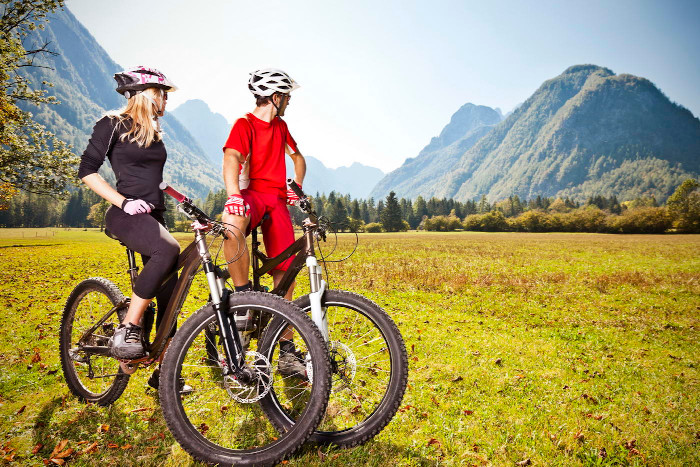

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;f
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

Сразу отделим признаки, с которыми будем дальше работать

In [9]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
data = pd.read_csv('day.csv', index_col=0)
data = data[columns]
data.head()

season  mnth  holiday  weekday  workingday  weathersit      temp   
instant                                                                     
1             1     1        0        6           0           2  0.344167  \
2             1     1        0        0           0           2  0.363478   
3             1     1        0        1           1           1  0.196364   
4             1     1        0        2           1           1  0.200000   
5             1     1        0        3           1           1  0.226957   

            atemp       hum  windspeed   cnt  
instant                                       
1        0.363625  0.805833   0.160446   985  
2        0.353739  0.696087   0.248539   801  
3        0.189405  0.437273   0.248309  1349  
4        0.212122  0.590435   0.160296  1562  
5        0.229270  0.436957   0.186900  1600

In [10]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.shape, test.shape

((584, 11), (147, 11))

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

In [11]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

Категориальные признаки - месяц, время года, день недели, тк они следуют друг за другом по циклу, их несколько.

Еще - праздник, рабочий день, тк на них бинарные ответы (да, нет).

И оценка благоприятности погода от 1 до 4, категорий всего 4, и к ним не допустимо с точки зрения природы применять арифметические операции.

Оставшиеся('temp', 'atemp', 'hum', 'windspeed') не категориальные, к ним можно применять арифметические операции.

Графики были построены только по 'season' и 'weathersit', тк:
1) working_day, тк выходных мало, и графики были неинформативны
2) month, тк есть season, и это примерно про одно и то же
3) weekday, тк график был не информативен
4) holiday, тк таких дней мало, и график был не инормативен 

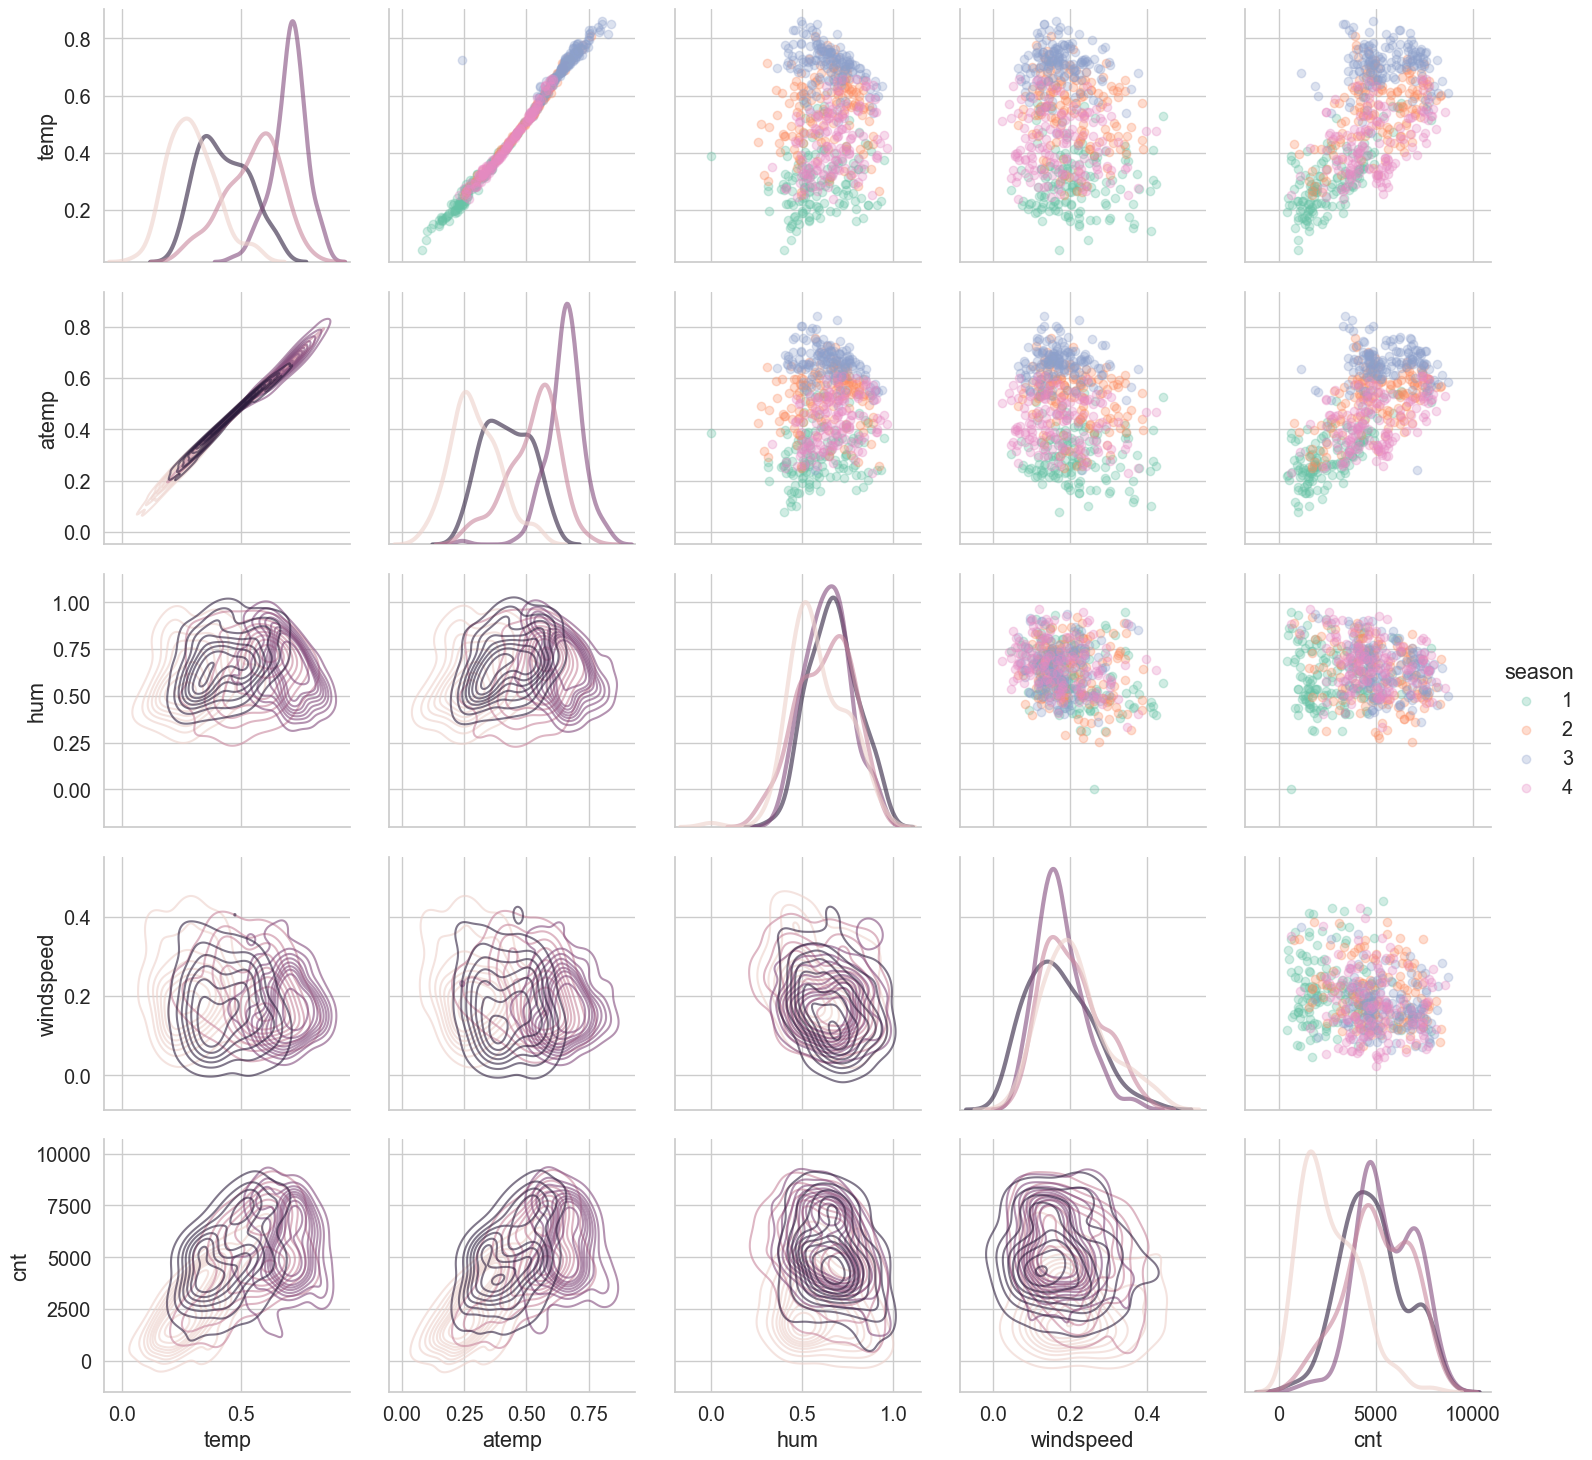

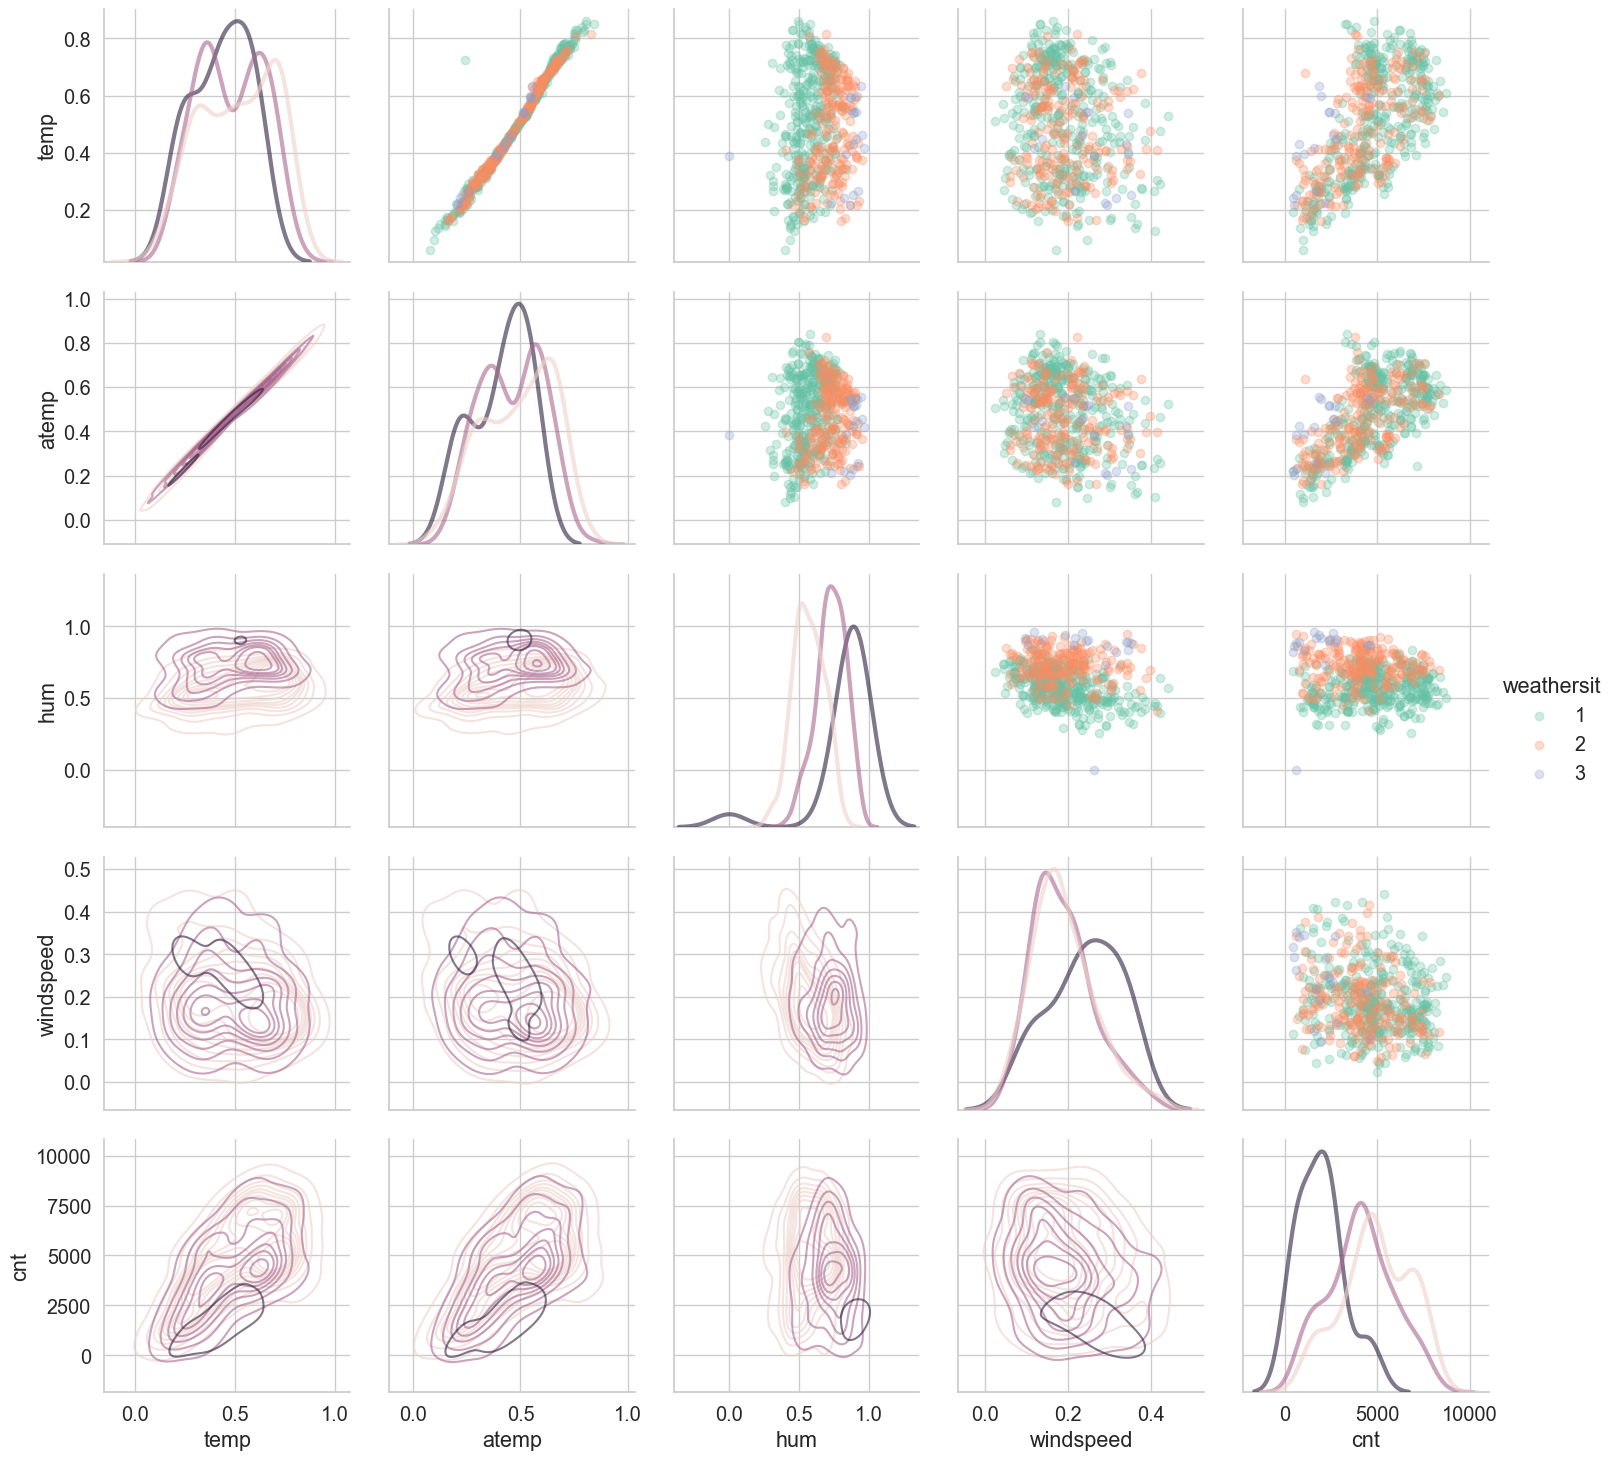

In [12]:
for hue in ['season', 'weathersit']:
    g = sns.PairGrid(train[['temp', 'atemp', 'hum', 'windspeed', 'cnt', hue]], 
                     hue=hue, diag_sharey=False, height=3)
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании
    
    g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**

1) зимой велопрокатом пользуются сильно меньше, чем в другие сезоны. В другие сезоны пользование примерно одинаковое.
2) Аналогично при оценке благоприятности погоды 3 на велопрокат сильно ниже спрос, чем при оценках 1 и 2.

В данных есть явные выбросы, на графиках temp-atemp, temp-hum, hum-windspeed, hum-cnt, а также hum-atemp

Видна зависимость cnt oт temp, которую возможно стоит рассмотреть как нелинейную. Ее вид больше напоминает степенную функцию, например, x^2.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** 
1) Наблдается линейная зависимость между temp и atemp. От одного из параметров нужно избавиться, тк он не несет никакой новой информации.
2) Чтобы избавиться от явного выброса на графиках с hum, поставим ограничение на hum (>0.1), тогда выбившаяся точка не попадет в ворота.
3) Закодируем категориальные признаки с помощью OneHotEncoder.  

Реализуйте данную процедуру.

In [13]:
new_real_features = ['temp', 'hum', 'windspeed']
train = train[train['hum'] > 0.1]
train

season  mnth  holiday  weekday  workingday  weathersit      temp   
instant                                                                     
683           4    11        0        2           1           2  0.343333  \
251           3     9        0        4           1           3  0.633913   
337           4    12        0        6           0           1  0.299167   
261           3     9        0        0           0           1  0.507500   
544           3     6        0        3           1           1  0.697500   
...         ...   ...      ...      ...         ...         ...       ...   
72            1     3        0        0           0           1  0.384348   
107           2     4        0        0           0           1  0.456667   
271           4     9        0        3           1           2  0.635000   
436           1     3        0        0           0           1  0.361739   
103           2     4        0        3           1           2  0.412500   

            atemp       hum  windspeed   cnt  
instant                                       
683      0.323225  0.662917   0.342046  4094  
251      0.555361  0.939565   0.192748  1842  
337      0.310604  0.612917   0.095783  3614  
261      0.490537  0.695000   0.178483  4274  
544      0.640792  0.360000   0.271775  7335  
...           ...       ...        ...   ...  
72       0.380091  0.527391   0.270604  2417  
107      0.445696  0.479583   0.303496  3744  
271      0.575158  0.848750   0.148629  3907  
436      0.359670  0.476957   0.222587  4911  
103      0.417283  0.819167   0.250617  2162  

[583 rows x 11 columns]

In [14]:
categorial_important = ['season', 'weathersit']
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_important])
train_cat

array([[0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0.]])

In [15]:
encoder.categories_

[array([1, 2, 3, 4]), array([1, 2, 3])]

In [16]:
X_train = np.hstack([train[new_real_features], train_cat])
X_train.shape

(583, 8)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [17]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_feature])
model.coef_

array([ 6562.0440387 , -2844.65321513, -2932.37268755,   827.85623608,
         230.16114951,  1476.59089065,  -187.17996316, -1522.06747144])

In [18]:
model.intercept_

3118.8242068283907

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

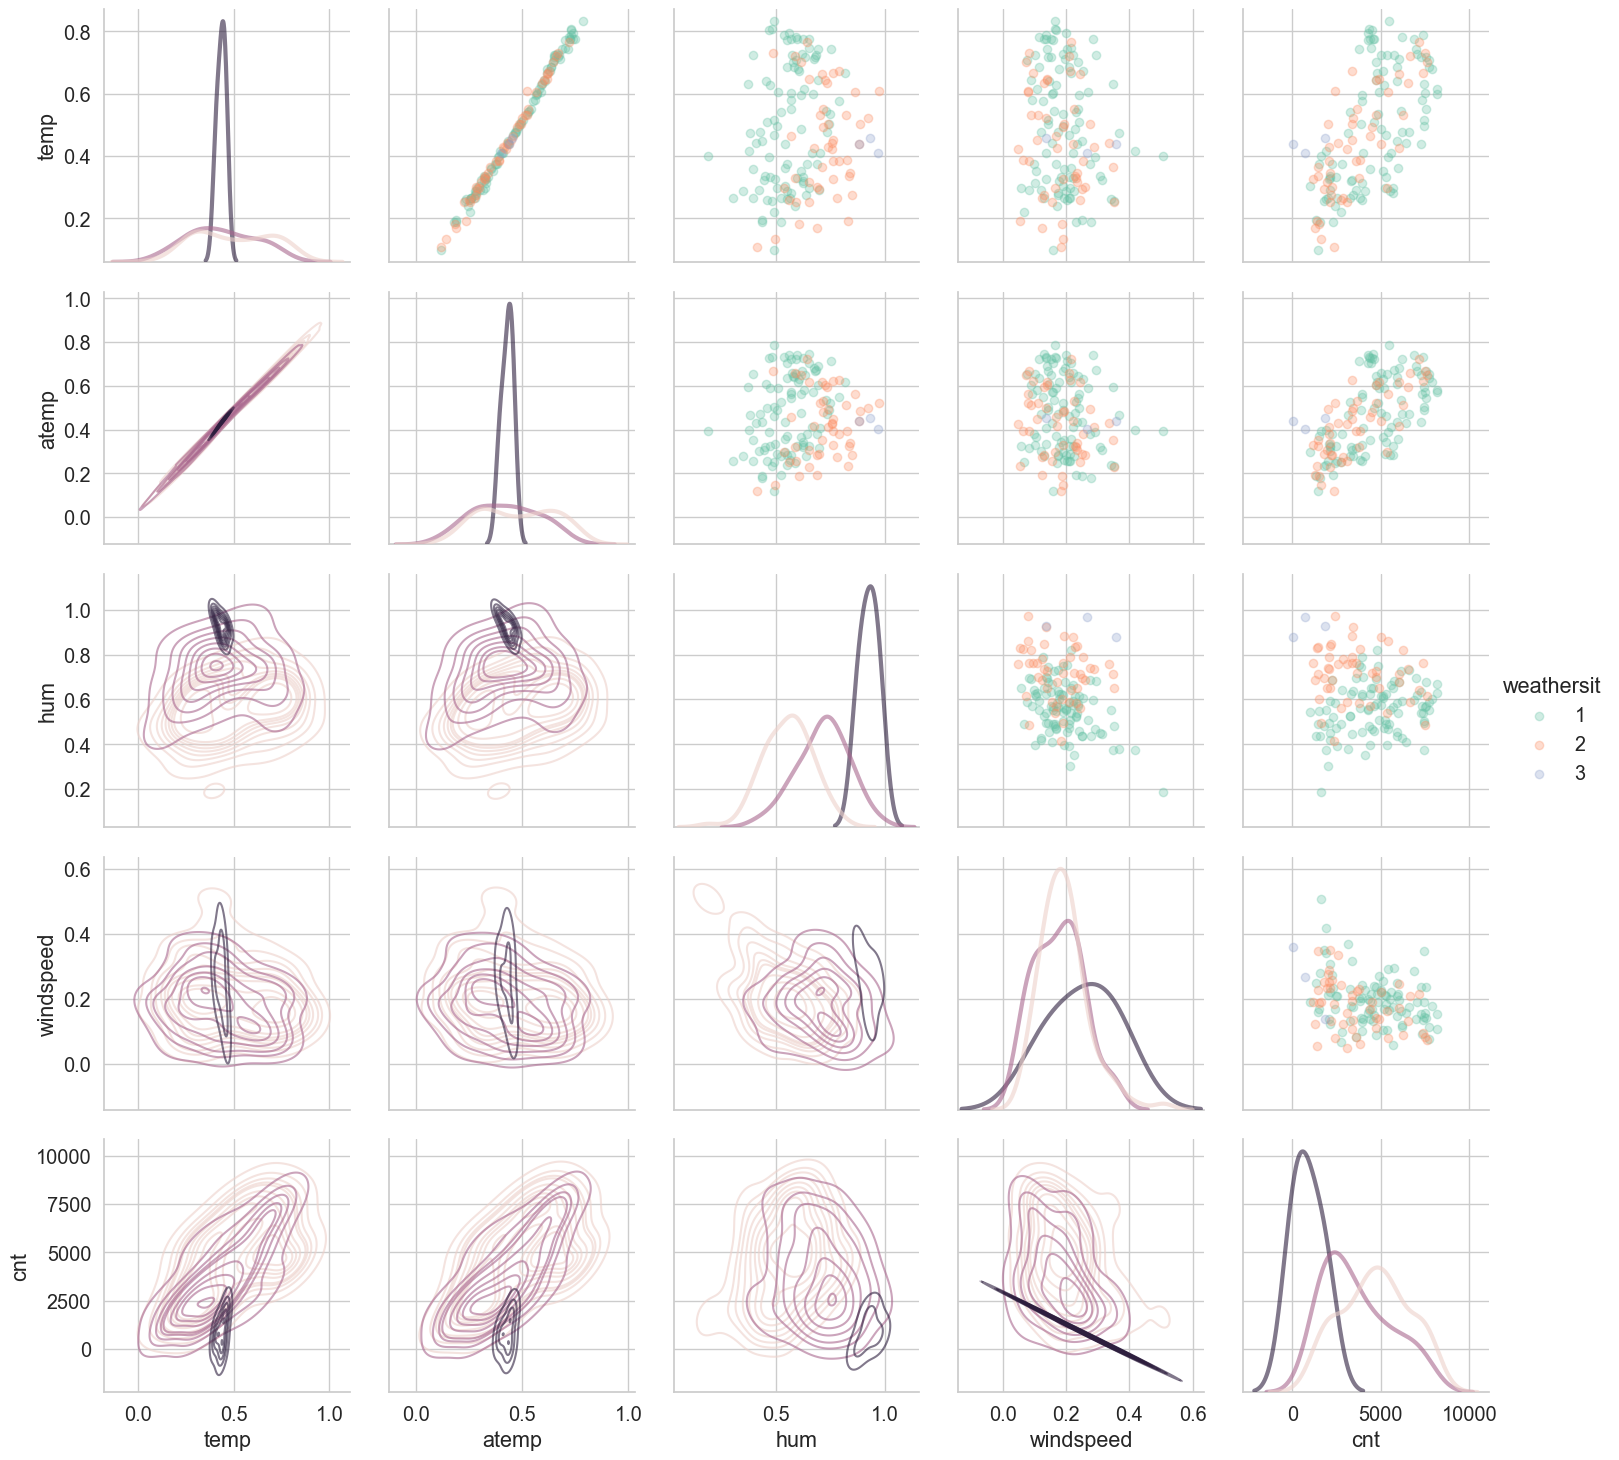

In [19]:
hue = 'weathersit'
g = sns.PairGrid(test[['temp', 'atemp', 'hum', 'windspeed', 'cnt', hue]], 
                 hue=hue, diag_sharey=False, height=3)

g.map_lower(sns.kdeplot, alpha=0.6)
g.map_upper(plt.scatter, alpha=0.3)
g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
           common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании

g.add_legend()

Графики были единожды построены для тестовой выборки, чтобы пронаблюдать явные выбросы. Такой является точка с маленьким значением hum. Далее не будем ее рассматривать.

In [20]:
test = test[test['hum'] > 0.2]
test_cat = encoder.transform(test[categorial_important])
X_test = np.hstack([test[new_real_features], test_cat])
test_preds = model.predict(X_test)

In [21]:
print (metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5, 
       metrics.mean_absolute_error(test[target_feature], test_preds), 
       metrics.mean_absolute_percentage_error(test[target_feature], test_preds)
      )

1334.2255132772943 1153.8773750830433 1.0802563834956542


Ошибка предсказания по метрике MAPE составляет 108%.

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Считаем оценку коэффициентов с помощью явной формулы МНК. Для учета константного признака добавляем столбец из единиц.

In [22]:
Y_train = train[target_feature]
X_tr = np.array(X_train)
X_tr = np.hstack((X_tr, np.ones((X_train.shape[0], 1))))
coef_formula = np.linalg.inv(X_tr.transpose() @ X_tr) @ X_tr.transpose() @ Y_train
coef_formula

array([ 6562.0440387 , -2844.65321513, -2932.37268755,   827.85623608,
         230.16114951,  1476.59089065,  -187.17996316, -1522.06747144,
        3118.82420683])

In [23]:
model.coef_

array([ 6562.0440387 , -2844.65321513, -2932.37268755,   827.85623608,
         230.16114951,  1476.59089065,  -187.17996316, -1522.06747144])

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Проблема должна заключаться в том, что коэффициенты не совпадают в случае применения МНК из sklearn и МНК, написанного вручную.
Тк в данном случае коэффициенты совпали, то ухудшим модель, чтобы явно пронаблюдать потенциальную проблему. Для этого используем все категориальные признаки.

In [24]:
encoder2 = OneHotEncoder(drop='first', sparse_output=False)
train_cat2 = encoder2.fit_transform(train[categorial_features])
X_train2 = np.hstack([train[new_real_features], train_cat2])
model2 = LinearRegression(fit_intercept=True)
model2.fit(X_train2, train[target_feature])

LinearRegression()

In [25]:
test_cat2 = encoder2.transform(test[categorial_features])
X_test2 = np.hstack([test[new_real_features], test_cat2])
test_preds2 = model2.predict(X_test2)

In [26]:
print (metrics.mean_squared_error(test[target_feature], test_preds2) ** 0.5, 
       metrics.mean_absolute_error(test[target_feature], test_preds2), 
       metrics.mean_absolute_percentage_error(test[target_feature], test_preds2)
      )

1365.9171383778555 1180.0618776958324 1.1216123613360756


In [27]:
X_tr2 = np.hstack((np.array(X_train2), np.ones((X_train2.shape[0], 1))))
coef_formula = np.linalg.inv(X_tr2.transpose() @ X_tr2) @ X_tr2.transpose() @ Y_train
coef_formula

array([ 27618.78288189, -18928.55353653,   1814.41743549,   1949.90742388,
         2591.71121783,   1995.27491364,    308.65277608,    796.42041854,
        -1495.06401686,  -1513.29037821,  -2977.52783206,  -3655.42231129,
        -3411.40199656,  -1373.75239815,   -680.66811088,  -1208.89225832,
         -574.56680559,  23888.65254373, -22048.0847249 , -26966.77391259,
       -30192.60508743, -23499.21668182, -25511.45445672,    474.87376236,
        21766.76160525,   -182.21303028,  -1497.27311443,   2991.40018363])

In [28]:
print (model2.coef_, model2.intercept_)

[ 7322.93270627 -3485.15089924 -3198.29562857   867.54394807
   578.59108087  1497.94994702    36.21950304   489.65634717
  -200.23798252   -11.78026033  -613.34046447 -1204.40570565
  -706.76994024   408.59657942   158.89846346  -272.6000211
   -62.46613764  -370.95160913    37.50308356   -74.39303396
   -47.43515072   -73.11416444   103.34732329   474.87376236
   316.85966686  -182.21303028 -1497.27311443] 2991.4001836329717


Сделайте выводы.

**Выводы:**
Модель со всеми категориальными признаками по метрикам оказалась хуже, чем модель с избранными категориальными признаками.
В ней также не совпали коэффициенты, посчитанные sklearn и вручную.
Линейная оценка дает большое значение MAPE, то есть оказывается не очень точной для предсказания.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

**Решение задачи в отдельном файле pdf**

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

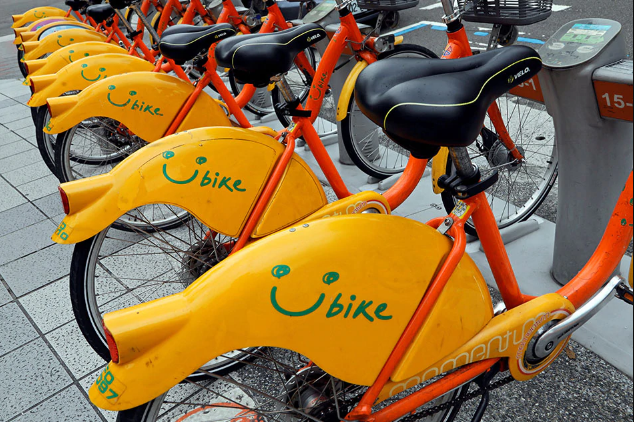

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

Напишем с помощью явной формулы из предыдщуего номера. Будем добавлять константный признак (столбец из единиц) в случае, если fit_intercet == True, и не будем добавлять иначе.

In [29]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
        
    def fit(self, X, Y):
        if self.fit_intercept == True:
            X = np.hstack((np.array(X), np.ones((X.shape[0], 1))))
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.
        
        self.theta = np.linalg.inv(X.transpose() @ X + self.lambd * np.eye(X.shape[1])) @ X.transpose() @ Y
        
        return self
    
    
    def predict(self, X):
        if self.fit_intercept == True:
            X = np.hstack((np.array(X), np.ones((X.shape[0], 1))))
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        
        # Посчитайте предсказания
        predictions = X @ self.theta
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [30]:
df_train, df_test1 = train_test_split(data, test_size=0.4, random_state=30)
df_test, df_val = train_test_split(df_test1, test_size=0.5, random_state=30)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

In [31]:
df_train = df_train[df_train['hum'] > 0.2]
df_test = df_test[df_test['hum'] > 0.2]
df_val = df_val[df_val['hum'] > 0.2]

Выше мы избавились от точек, которые сильно выпадают. Далее отнормируем данные, тк это необходимо по выводам из предыдущей задачи, с помощью scaler.

In [32]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(df_train[categorial_features])
X_train = np.hstack([df_train[real_features], train_cat])

#scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [33]:
lambdas = np.logspace(-3, 6, num=100)
models = []

for lam in lambdas:
    model = RidgeRegression(lambd = lam, fit_intercept=True)
    model.fit(X_train, df_train[target_feature])
    models.append(model)
    

In [34]:
val_cat = encoder.transform(df_val[categorial_features])
X_val = np.hstack([df_val[real_features], val_cat])
X_val = scaler.transform(X_val)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [35]:
RMSE_val = []
MAE_val = []
MAPE_val = []
RMSE_train = []
MAE_train = []
MAPE_train = []
for model in models:
    preds_val = model.predict(X_val)
    preds_train = model.predict(X_train)
    RMSE_val.append(metrics.mean_squared_error(df_val[target_feature], preds_val) ** 0.5)
    MAE_val.append(metrics.mean_absolute_error(df_val[target_feature], preds_val))
    MAPE_val.append(metrics.mean_absolute_percentage_error(df_val[target_feature], preds_val))
    RMSE_train.append(metrics.mean_squared_error(df_train[target_feature], preds_train) ** 0.5)
    MAE_train.append(metrics.mean_absolute_error(df_train[target_feature], preds_train))
    MAPE_train.append(metrics.mean_absolute_percentage_error(df_train[target_feature], preds_train))

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

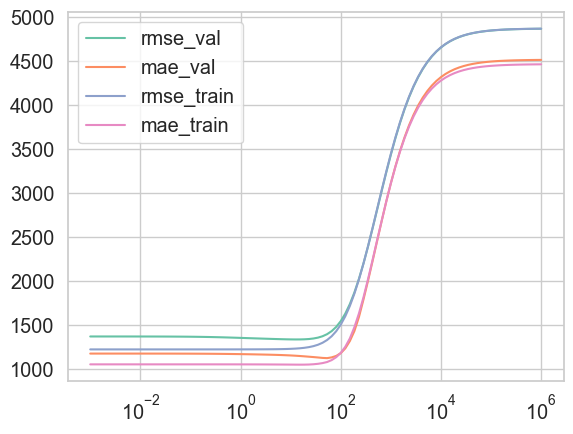

In [36]:
plt.plot(lambdas, RMSE_val, label='rmse_val')
plt.plot(lambdas, MAE_val, label='mae_val')
plt.plot(lambdas, RMSE_train, label='rmse_train')
plt.plot(lambdas, MAE_train, label='mae_train')
plt.xscale('log')
plt.legend()
plt.show()

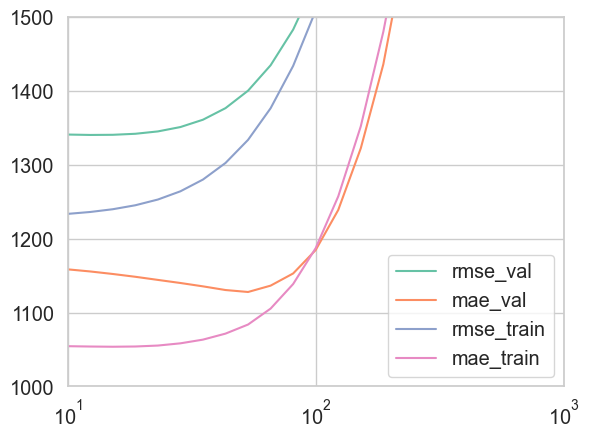

In [37]:
plt.plot(lambdas, RMSE_val, label='rmse_val')
plt.plot(lambdas, MAE_val, label='mae_val')
plt.plot(lambdas, RMSE_train, label='rmse_train')
plt.plot(lambdas, MAE_train, label='mae_train')
plt.xscale('log')
plt.legend()
plt.xlim(10, 1000)
plt.ylim(1000, 1500)
plt.show()

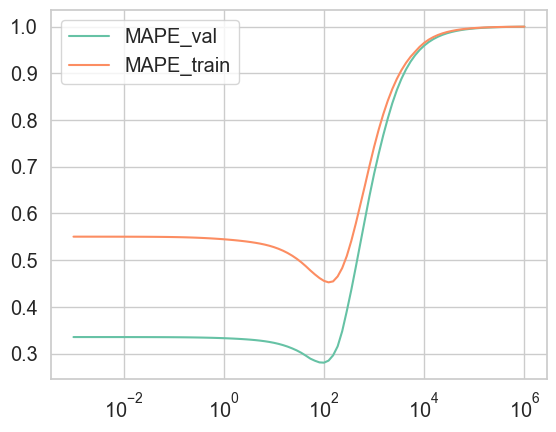

In [38]:
plt.plot(lambdas, MAPE_val, label='MAPE_val')
plt.plot(lambdas, MAPE_train, label='MAPE_train')
plt.xscale('log')
plt.legend()
plt.show()

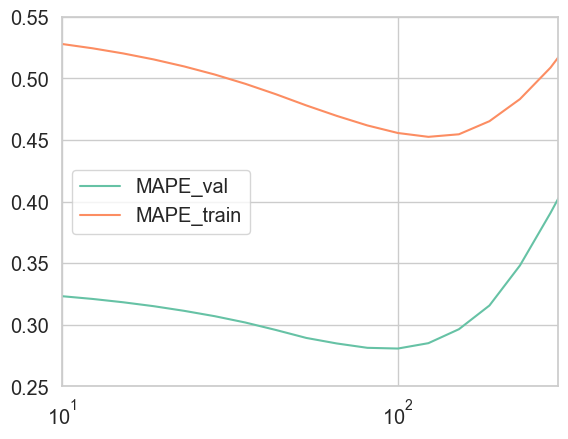

In [39]:
plt.plot(lambdas, MAPE_val, label='MAPE_val')
plt.plot(lambdas, MAPE_train, label='MAPE_train')
plt.xscale('log')
plt.xlim(10, 300)
plt.ylim(0.25, 0.55)
plt.legend()
plt.show()

Построены 2 графика для каждого из набора метрик: RMSE, MAE и MAPE для наборов val и train. На первом графике в каждой категории большой диапазон для лямбд, на втором приближенный график для потенциального минимума.

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

In [40]:
X_train.shape

(436, 28)

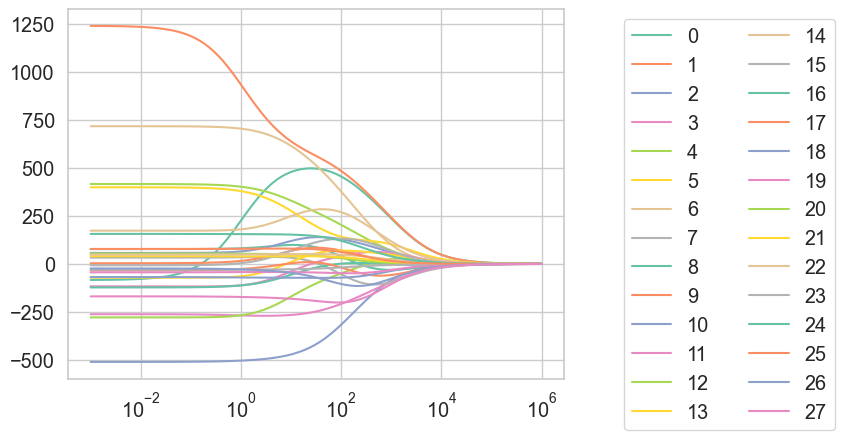

In [41]:
thetas = []
for i in range(0, X_train.shape[1]):
    current_theta = []
    for model in models:
        current_theta.append(model.theta[i])
    plt.plot(lambdas, current_theta, label=i)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.1, 1), ncol=2)
plt.show()

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Наименьшее значение MAPE наблюдается в окрестностях точки lambda = 10^2. Для RMSE и MAE значение при этой лямбде тоже почти наименьшее. Тк нам выгодно брать как раз наименьшие значения, тк они соответсвуют наибольшей точности предсказаний, то была выбрана именно такая lambda. Ей соответствует 55-ая модель в моделях.

In [42]:
final_lambda = 100;
lambdas[55]

100.0

In [43]:
test_cat = encoder.transform(df_test[categorial_features])
X_test = np.hstack([df_test[real_features], test_cat])
X_test = scaler.transform(X_test)

preds_test = models[55].predict(X_test)
RMSE = metrics.mean_squared_error(df_test[target_feature], preds_test) ** 0.5
MAE = metrics.mean_absolute_error(df_test[target_feature], preds_test)
MAPE = metrics.mean_absolute_percentage_error(df_test[target_feature], preds_test)

print(RMSE, MAE, MAPE)

1529.151222429291 1175.5194762405697 0.24564187632698353


Сделайте выводы.

Точность предсказания получилась достаточно высокой (MAPE составляет 24%).
В ходе работы были проверены метрики и для других random_state при разбиении на test, train и val. MAPE почти всегда была приблизительно равна 30%. В единичных случаях она была ощутимо выше - например, при random_state = 42 доходила до 80%.

**Выводы**
C помощью написанной вручную Ridge-регрессии мы получили намного более точно предсказывающую модель (ниже метрики), чем с помощью МНК и встроенную в sklearn, и написанную вручную. (Показатель MAPE составил примерно  30% на фоне 108%)
Для анализа данного набора данных больше подходит Ridge-регрессия.

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

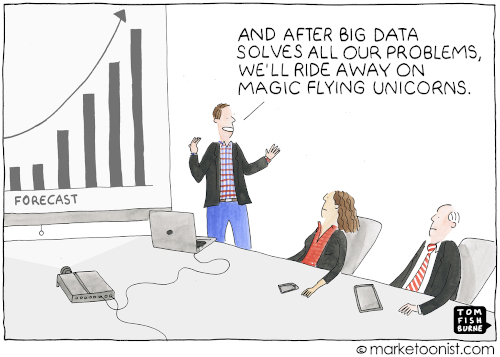

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [120]:
# изначально - столбец из нулей
Q = np.full((X_train.shape[1], 1), 0)
Q.shape

(28, 1)

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

In [127]:
Y_val = df_val[target_feature].to_numpy()
Y_train = df_train[target_feature].to_numpy()
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_val = Y_val.reshape(Y_val.shape[0], 1)

In [128]:
learning_rate = 0.0004;
batch_sz = 128;

indices = []
Q_process = []
Q_process.append(Q)
for i in range(1, 50):
    for j in range(1, batch_sz):
        indices.append(random.randint(0, X_train.shape[0] - 1))
    X_ind = X_train[indices]
    Y_ind = Y_train[indices]
    # Y_ind = Y_ind.reshape(Y_ind.shape[0], 1)
    Q = Q - (learning_rate * X_train.shape[1] / batch_sz) * ((-1) * X_ind.transpose() @ Y_ind + X_ind.transpose() @ X_ind @ Q + final_lambda * Q)
    Q_process.append(Q)

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [129]:
RMSE_tr_sgd = []
MAE_tr_sgd = []
MAPE_tr_sgd = []
RMSE_val_sgd = []
MAE_val_sgd = []
MAPE_val_sgd = []

In [130]:
for one_Q in Q_process:
    preds_train_sgd = X_train @ one_Q
    preds_val_sgd = X_val @ one_Q
    RMSE_tr_sgd.append(metrics.mean_squared_error(Y_train, preds_train_sgd) ** 0.5)
    MAE_tr_sgd.append(metrics.mean_absolute_error(Y_train, preds_train_sgd))
    MAPE_tr_sgd.append(metrics.mean_absolute_percentage_error(Y_train, preds_train_sgd))
    RMSE_val_sgd.append(metrics.mean_squared_error(Y_val, preds_val_sgd) ** 0.5)
    MAE_val_sgd.append(metrics.mean_absolute_error(Y_val, preds_val_sgd))
    MAPE_val_sgd.append(metrics.mean_absolute_percentage_error(Y_val, preds_val_sgd))

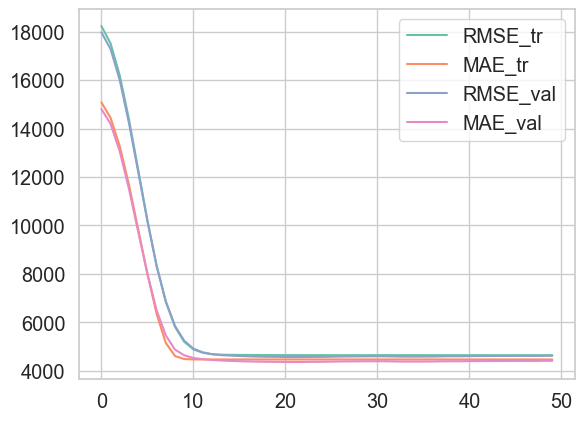

In [131]:
plt.plot(range(len(RMSE_tr_sgd)), RMSE_tr_sgd, label='RMSE_tr')
plt.plot(range(len(RMSE_tr_sgd)), MAE_tr_sgd, label='MAE_tr')
plt.plot(range(len(RMSE_tr_sgd)), RMSE_val_sgd, label='RMSE_val')
plt.plot(range(len(RMSE_tr_sgd)), MAE_val_sgd, label='MAE_val')
plt.legend()
plt.show()

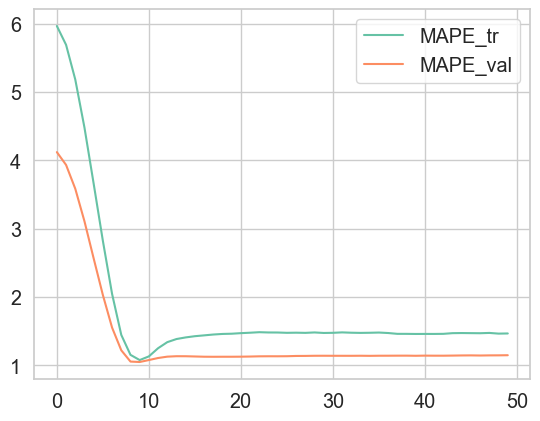

In [132]:
plt.plot(MAPE_tr_sgd, label='MAPE_tr')
plt.plot(MAPE_val_sgd, label='MAPE_val')
plt.legend()
plt.show()

In [141]:
print(metrics.mean_absolute_percentage_error(Y_train, X_train @ Q_process[20]), 
      metrics.mean_absolute_percentage_error(Y_train, X_train @ Q_process[30]),
      metrics.mean_absolute_percentage_error(Y_train, X_train @ Q_process[49])
     )

1.4723828257578522 1.4772649942950113 1.4677849382981218


Изначально значения Q плохие, точность предсказания низкая. Затем точность растет, как и должно быть.
Уже примерно на 20-ой итерации значения метрик стабилизируются.

Посчитайте ошибку на тестовой выборке.

In [140]:
Y_test = df_test[target_feature].to_numpy()
Y_test = df_test[target_feature].to_numpy()
preds_test_sgd = X_test @ Q_process[49]
print(metrics.mean_squared_error(Y_test, preds_test_sgd) ** 0.5,
    metrics.mean_absolute_error(Y_test, preds_test_sgd),
    metrics.mean_absolute_percentage_error(Y_test, preds_test_sgd))

4711.473306868182 4546.125779482519 1.2072380136986784


Сделайте выводы.
**Выводы:**
Точность составила около 120%, что ниже чем в первых 2 случаях.